In [1]:
%reload_ext autoreload
%autoreload 2
from nbs_uncertainty.readers.bathymetry import load_file
from nbs_uncertainty.processors.bathy_processors import BathyProcessor
from nbs_uncertainty.estimators import uncertaintyEstimators
from nbs_uncertainty.utils import helper

from matplotlib import pyplot as plt

In [2]:
# define bathymetry filename
# directory location defined in config.ini file under config folder
filename = "BlueTopo.tiff"

# Read filename and load bathy data
bathy_data = load_file(filename)
print(bathy_data)

Type: RasterBathymetry
 Filename: BlueTopo.tiff
 Location: ..\data\raster
 Resolution: 4.0
 No Data Value: 1000000.0
 Min\Max value: [(np.float32(-106.318), np.float32(-35.669))]
 Data Shape: (2035, 1493)


In [3]:
# define processing parameters
linespacing = 32
max_multiple = 4
current_multiple = 1
settings = {'linespacing': linespacing,
            'max_multiple': max_multiple,
            'current_multiple': current_multiple,
            'subsampling': 'across'}

In [4]:
residual = BathyProcessor.compute_residual(bathy_data, param=settings)
type(residual)

nbs_uncertainty.readers.bathymetry.RasterBathymetry

In [17]:
print(residual)

In [16]:
residual

In [5]:
uncertainty_amp_v1 = BathyProcessor.estimate_uncertainty('amp_v1', residual)
uncertainty_psd_v1 = BathyProcessor.estimate_uncertainty('psd_v1', residual)
uncertainty_amp_elias = BathyProcessor.estimate_uncertainty('amp_v2', residual)
uncertainty_psd_elias = BathyProcessor.estimate_uncertainty('psd_v2', residual)
uncertainty_psd_n = BathyProcessor.estimate_uncertainty('psd_n', residual)
uncertainty_psd_lf = BathyProcessor.estimate_uncertainty('psd_lf', residual)
uncertainty_psd_df = BathyProcessor.estimate_uncertainty('psd_df', residual)
uncertainty_spectrum_elias = BathyProcessor.estimate_uncertainty('spectrum', residual)

In [6]:
uncertainty_diff_std = BathyProcessor.estimate_uncertainty('spatial_std', residual)
uncertainty_spatial_diff = BathyProcessor.estimate_uncertainty('spatial_diff', residual)
# uncertainty_diff_psd = BathyProcessor.estimate_uncertainty('spatial_gev', residual)
uncertainty_spatial_gaussian = BathyProcessor.estimate_uncertainty('spatial_gaussian', residual)

In [ ]:
# def multi_uncertainty_comparison(
#     residuals,
#     uncertainties_dict,
#     resolution,
#     desired_linespacing_meters=None,
#     fn=None,
#     plot_grid=(3, 3),
#     path=None,
#     plot_boxplots=True
# )

residual = residual.data
uncertainties_dict = {
    "Amplitude": uncertainty_amp_v1.data,
    "PSD(F)": uncertainty_psd_v1.data,
    "Amplitude (Elias)": uncertainty_amp_elias.data,
    "ASD": uncertainty_amp_elias.data,
    "PSD(n)": uncertainty_psd_n.data,
    "PSD(lf)": uncertainty_psd_lf.data,
    "PSD(df)": uncertainty_psd_df.data,
    "Spatial Max Diff": uncertainty_spatial_diff.metadata['results']['difference_max'],
    "Spatial Diff Envelope1": uncertainty_spatial_diff.metadata['results']['difference_max'],
    "Spatial Gaussian 95%": uncertainty_spatial_gaussian.metadata['results']['gaussian_p95_stats'],
    "Spatial Gaussian 99%": uncertainty_spatial_gaussian.metadata['results']['gaussian_p99_stats'],
    "Spatial Gaussian Mean": uncertainty_spatial_gaussian.metadata['results']['gaussian_mean'],
    }



In [13]:
uncertainties_dict['Amplitude']

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], shape=(2035, 1493))

(array([   0,    0,    0, ..., 2034, 2034, 2034], shape=(2653640,)), array([  13,   14,   15, ..., 1476, 1477, 1478], shape=(2653640,)))


TypeError: only integer scalar arrays can be converted to a scalar index

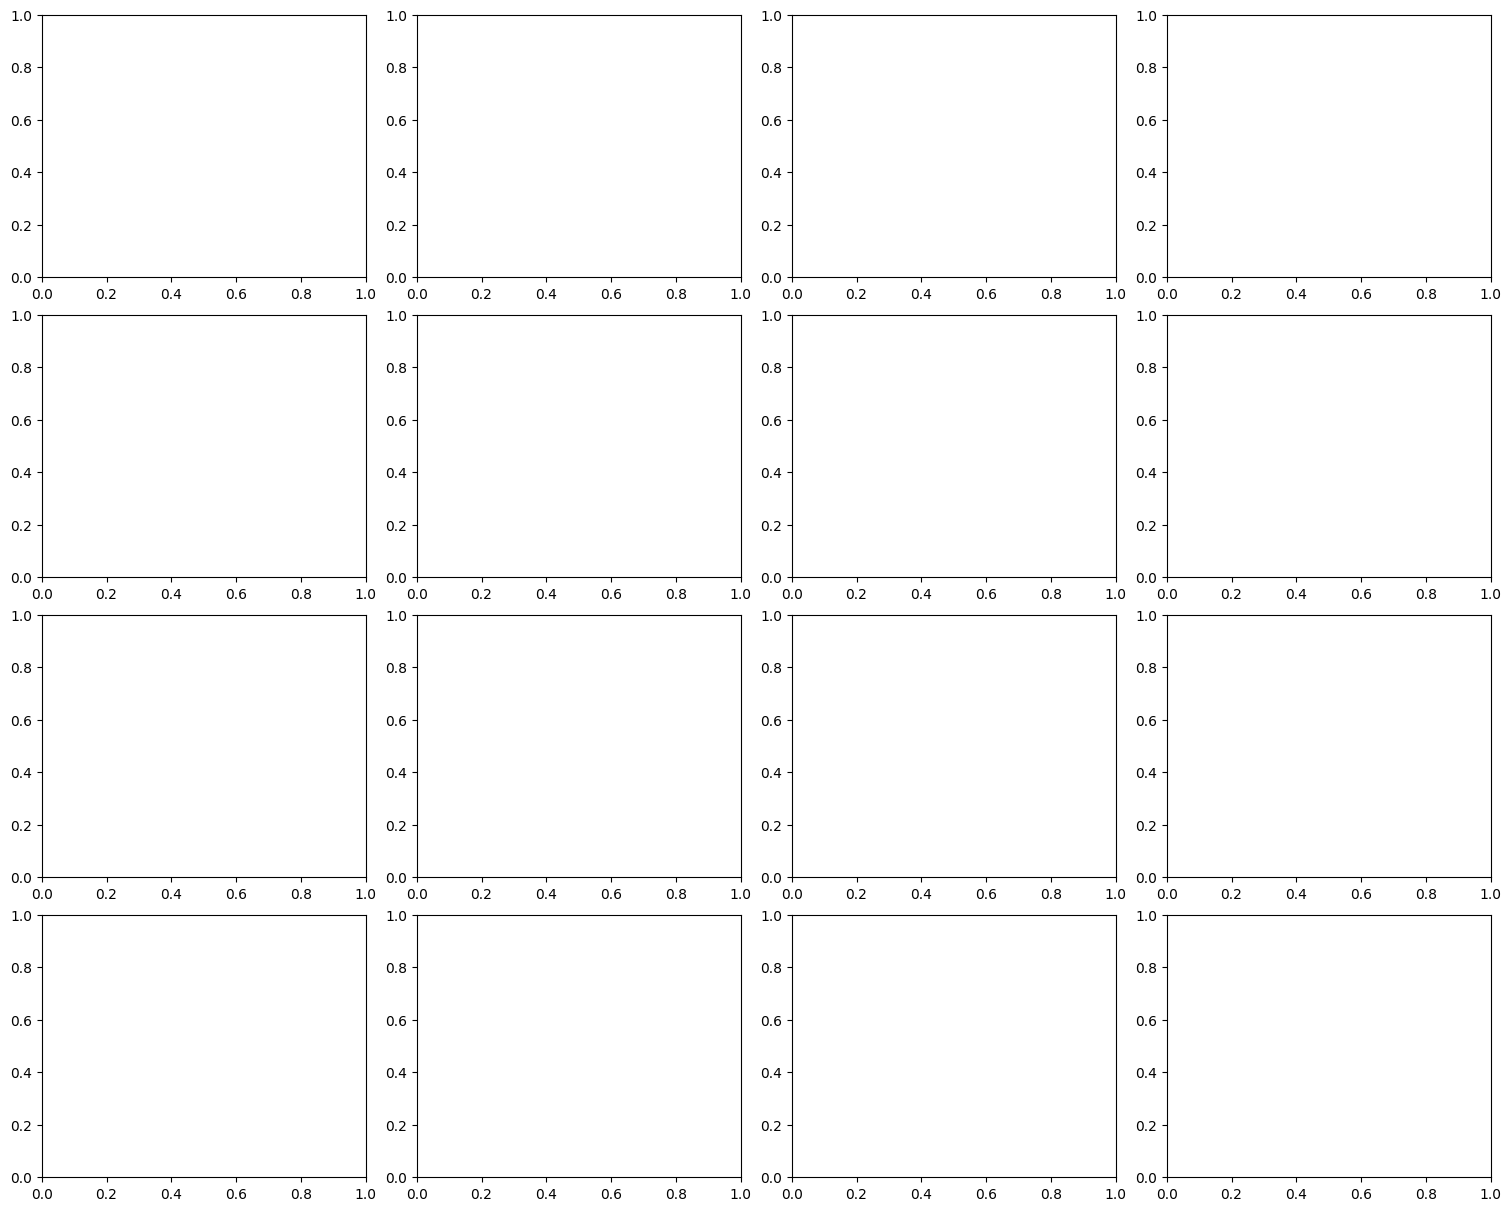

In [12]:
helper.multi_uncertainty_comparison(
    residuals=residual,
    uncertainties_dict=uncertainties_dict,
    resolution=bathy_data.metadata['resolution'],
    desired_linespacing_meters=linespacing,
    fn="Surface: BlueTopo",
    plot_grid=(4, 4),
    # path="./",
    # plot_boxplots=True
)